In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from skimage import io, img_as_float

[[2295.  -0.j    0.+255.j -255.  -0.j    0.-255.j]
 [-255.  +0.j    0.-255.j  255.  +0.j    0.+255.j]
 [ 255.  -0.j    0.+255.j 1785.  -0.j    0.-255.j]
 [-255.  -0.j    0.-255.j  255.  -0.j    0.+255.j]]


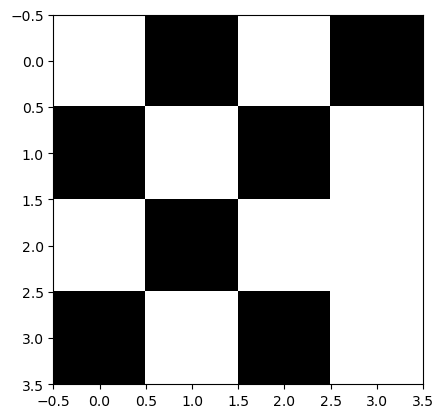

In [18]:
image = 255 * np.array([[1,0,1,0], [0,1,0,1], [1,0,1,1], [0,1,0,1]])

f = fftpack.fft2(image)
print(f)
plt.imshow(image, cmap='gray')

[[2295.  255.  255.  255.]
 [ 255.  255.  255.  255.]
 [ 255.  255. 1785.  255.]
 [ 255.  255.  255.  255.]]


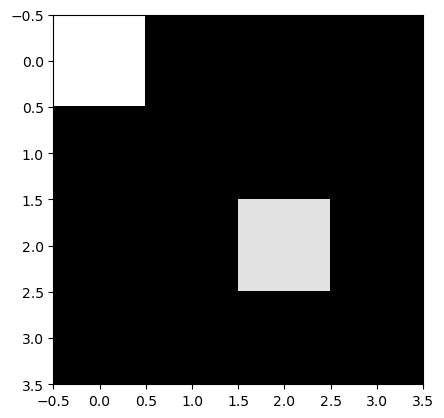

In [19]:
s = np.abs(f)
print(s)
plt.imshow(np.log(1+s), cmap='gray')

In [20]:
fc = fftpack.fftshift(f)
print(fc)

[[1785.  -0.j    0.-255.j  255.  -0.j    0.+255.j]
 [ 255.  -0.j    0.+255.j -255.  -0.j    0.-255.j]
 [-255.  -0.j    0.-255.j 2295.  -0.j    0.+255.j]
 [ 255.  +0.j    0.+255.j -255.  +0.j    0.-255.j]]


In [22]:
fi = fftpack.ifftshift(fc)
print(fi)

[[2295.  -0.j    0.+255.j -255.  -0.j    0.-255.j]
 [-255.  +0.j    0.-255.j  255.  +0.j    0.+255.j]
 [ 255.  -0.j    0.+255.j 1785.  -0.j    0.-255.j]
 [-255.  -0.j    0.-255.j  255.  -0.j    0.+255.j]]


In [25]:
i ,r= np.imag(f), np.real(f)

print(r)
print(i)

[[2295.    0. -255.    0.]
 [-255.    0.  255.    0.]
 [ 255.    0. 1785.    0.]
 [-255.    0.  255.    0.]]
[[  -0.  255.   -0. -255.]
 [   0. -255.    0.  255.]
 [  -0.  255.   -0. -255.]
 [  -0. -255.   -0.  255.]]


In [26]:
phase = np.arctan2(i, r)
print(phase)

[[-0.          1.57079633 -3.14159265 -1.57079633]
 [ 3.14159265 -1.57079633  0.          1.57079633]
 [-0.          1.57079633 -0.         -1.57079633]
 [-3.14159265 -1.57079633 -0.          1.57079633]]


In [28]:
phase2 = np.angle(f)
print(phase2)

[[-0.          1.57079633 -3.14159265 -1.57079633]
 [ 3.14159265 -1.57079633  0.          1.57079633]
 [-0.          1.57079633 -0.         -1.57079633]
 [-3.14159265 -1.57079633 -0.          1.57079633]]


In [30]:
img = np.real(fftpack.ifft2(f))
print(img)

[[255.   0. 255.   0.]
 [  0. 255.   0. 255.]
 [255.   0. 255. 255.]
 [  0. 255.   0. 255.]]


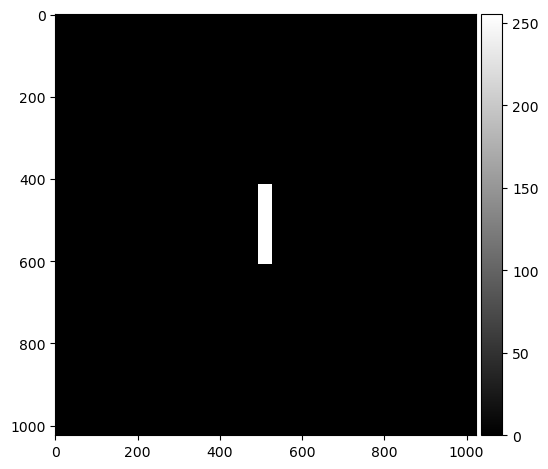

In [33]:
img = io.imread("chap4_images/rectangle.tif")
io.imshow(img, cmap='gray')

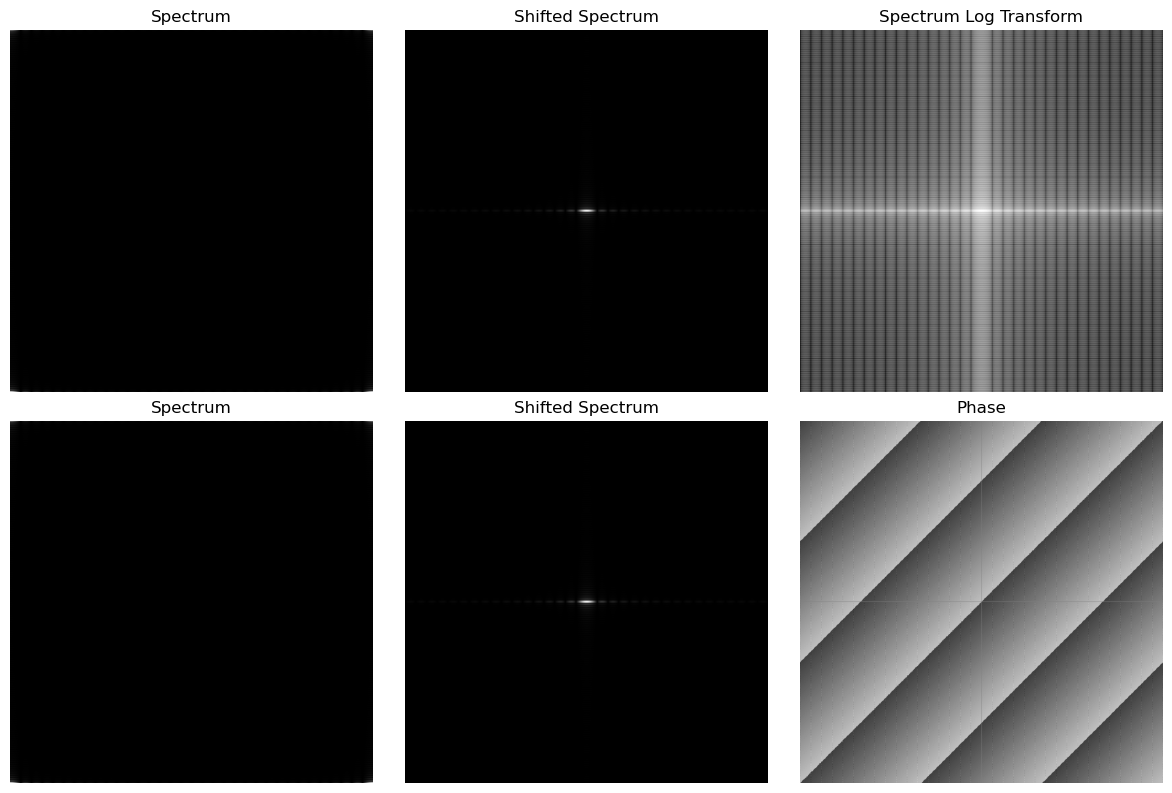

In [42]:
def dft_analysis(img):
    f_img = fftpack.fft2(img)
    spectrum = np.abs(f_img)
    phase = np.angle(f_img)
    
    shift_spectrum = fftpack.fftshift(spectrum)
    
    fig, axes = plt.subplots(2, 3, figsize=(12,8))
    
    axes[0, 0].imshow(spectrum, cmap='gray')
    axes[0, 0].axis('off')
    axes[0, 0].set_title('Spectrum')
    
    axes[0, 1].imshow(shift_spectrum, cmap='gray')
    axes[0, 1].axis('off')
    axes[0, 1].set_title('Shifted Spectrum')
    
    axes[0, 2].imshow(np.log(1 + shift_spectrum), cmap='gray')
    axes[0, 2].axis('off')
    axes[0, 2].set_title('Spectrum Log Transform')
    
    axes[1, 0].imshow(spectrum, cmap='gray')
    axes[1, 0].axis('off')
    axes[1, 0].set_title('Spectrum')
    
    axes[1, 1].imshow(fftpack.fftshift(spectrum), cmap='gray')
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Shifted Spectrum')
    
    axes[1, 2].imshow(phase, cmap='gray')
    axes[1, 2].axis('off')
    axes[1, 2].set_title('Phase')
    
    plt.tight_layout()
    plt.show()
    
dft_analysis(img)

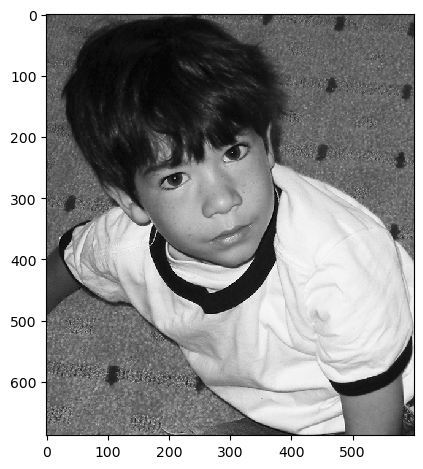

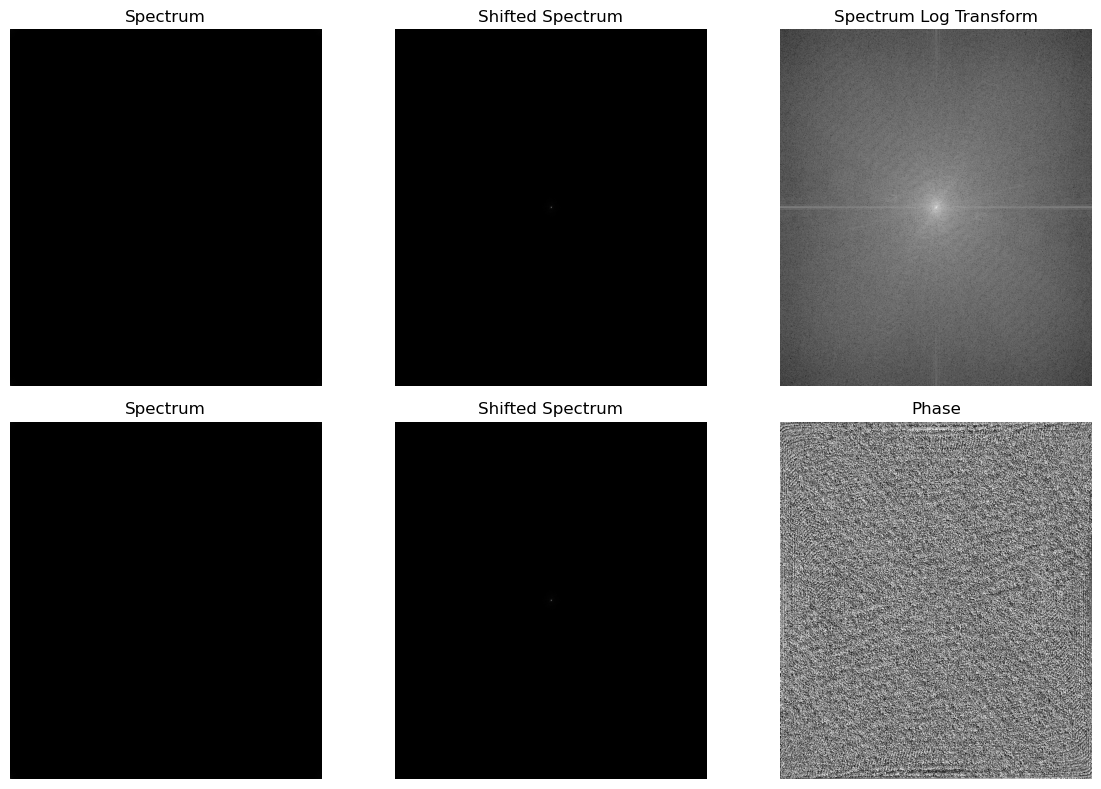

In [43]:
img = io.imread("chap4_images/boy.tif")
io.imshow(img, cmap='gray')

dft_analysis(img)

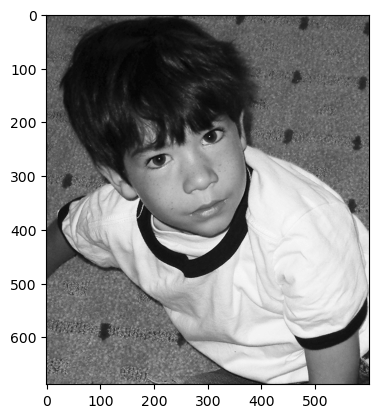

In [62]:
boy_img = io.imread("chap4_images/boy.tif")
f_boy_img = fftpack.fft2(boy_img)
boy_img_spectrum = np.abs(f_boy_img)
boy_img_phase = np.angle(f_boy_img)

rect_img = io.imread("chap4_images/rectangle.tif")
f_rect_img = fftpack.fft2(rect_img)
rect_img_spectrum = np.abs(f_rect_img)
rect_img_phase = np.angle(f_rect_img)


boy_im_res = np.multiply(boy_img_spectrum, np.exp(1j * boy_img_phase))
plt.imshow(np.real(fftpack.ifft2(boy_im_res)), cmap='gray')

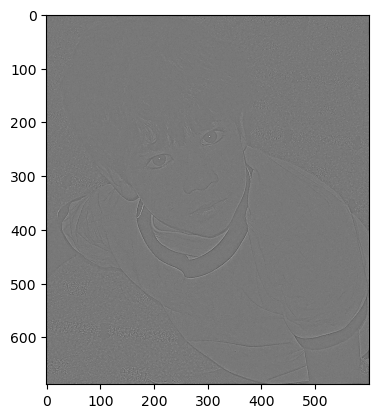

In [63]:
boy_phase_res = np.real(fftpack.ifft2(np.exp(1j*boy_img_phase)))
plt.imshow(boy_phase_res, cmap='gray')

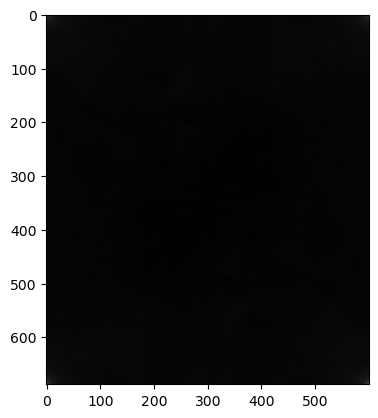

In [64]:
boy_im_res = np.multiply(boy_img_spectrum, np.exp(0j * boy_img_phase))
plt.imshow(np.real(fftpack.ifft2(boy_im_res)), cmap='gray')

In [66]:
bs_rp = np.multiply(boy_img_spectrum, np.exp(0j * rect_img_phase.re))
plt.imshow(np.real(fftpack.ifft2(bs_rp)), cmap='gray') 

TypeError: unsupported operand type(s) for *: 'complex' and 'NoneType'

In [79]:
im = img_as_float(io.imread('chap4_images/cameraman.tif'))
print(im.shape)
u = np.arange(0, im.shape[0], 1)
v = np.arange(0, im.shape[1], 1)
idx = np.where(u > im.shape[0]/2)
u[idx] = u[idx] - im.shape[0]
idy = np.where(v > im.shape[1]/2)
v[idy] = v[idy] - im.shape[1]
V, U = np.meshgrid(v, u)

(256, 256)


In [94]:
U

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [-3, -3, -3, ..., -3, -3, -3],
       [-2, -2, -2, ..., -2, -2, -2],
       [-1, -1, -1, ..., -1, -1, -1]])

In [92]:
D = np.sqrt(V**2 + U**2)
D

array([[0.        , 1.        , 2.        , ..., 3.        , 2.        ,
        1.        ],
       [1.        , 1.41421356, 2.23606798, ..., 3.16227766, 2.23606798,
        1.41421356],
       [2.        , 2.23606798, 2.82842712, ..., 3.60555128, 2.82842712,
        2.23606798],
       ...,
       [3.        , 3.16227766, 3.60555128, ..., 4.24264069, 3.60555128,
        3.16227766],
       [2.        , 2.23606798, 2.82842712, ..., 3.60555128, 2.82842712,
        2.23606798],
       [1.        , 1.41421356, 2.23606798, ..., 3.16227766, 2.23606798,
        1.41421356]])

In [164]:
def butterworth_reject_band_filter(img, DO, W, n=2):
    np.seterr(divide='ignore', invalid='ignore')
    
    M, N = img.shape
    u = np.arange(0, M, 1)
    v = np.arange(0, N, 1)

    idx = np.where(u > M/2)
    idy = np.where(v > N/2)

    u[idx] -= M
    v[idy] -= N

    V, U = np.meshgrid(v, u)
    D = np.sqrt((U )**2 + (V )** 2)
    
    
    denominator = D**2 - DO**2
    denominator[denominator == 0] = np.inf # We need to handle cases where the denominator is zero to keep the filter functional in all casees
    filter = 1 / (1 + ( D *W / (denominator))**(2*n))
    
    img_f_transform = fftpack.fft2(img)
    filtered_img = fftpack.ifft2(img_f_transform * filter).real
    
    filter_shift = fftpack.ifftshift(filter)
    
    return filtered_img, filter_shift

(-0.5, 719.5, 479.5, -0.5)

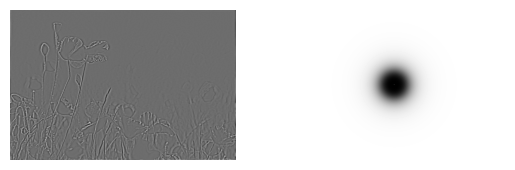

In [165]:
img = io.imread("images/poppies.png")
filtered_img, filter_shift = butterworth_reject_band_filter(img_as_float(img), 0, 50)

fig, axes = plt.subplots(1, 2)

axes[0].imshow(filtered_img, cmap='gray')
axes[0].axis('off')

axes[1].imshow(filter_shift, cmap='gray')
axes[1].axis('off')

In [158]:
filtered_img.mean()

0.3058115695352215

In [6]:
def band_reject_filter(shape, d0, w):
    
    P, Q = shape
    H = np.ones((P, Q))
    
    for u in range(0, P):
        for v in range(0, Q):
            D_uv = np.sqrt((u - (P/2))**2 + (v - (Q/2))**2)

            if D_uv == d0: # To avoid dividing by zero
               H[u, v] = 0
            else:
                H[u, v] = 1/(1 + ((D_uv*w)/(D_uv**2 - d0**2))**(2*2))

    return H


(-0.5, 719.5, 479.5, -0.5)

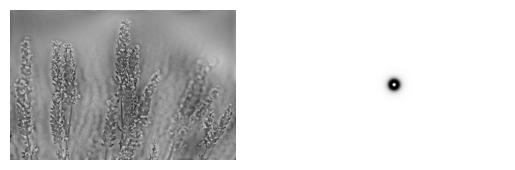

In [9]:
input_img = io.imread("images/lavender.png")
filter = band_reject_filter(img.shape,d0=10, w=15)

input_img_f_transform = fftpack.fft2(img)
filtered_img = fftpack.ifft2(input_img_f_transform * fftpack.fftshift(filter)).real

fig, axes = plt.subplots(1, 2)

axes[0].imshow(filtered_img, cmap='gray')
axes[0].axis('off')

axes[1].imshow(filter, cmap='gray')
axes[1].axis('off')


In [159]:
filtered_img.mean()

0.3058115695352215